# Data Cleansing & Preparation



## IMPORT LIBRARIES

In [131]:
!pip install category_encoders 

In [132]:
import pandas as pd
import numpy as np
import category_encoders as ce #binary encoding
from sklearn.model_selection import train_test_split

pd.options.display.max_colwidth = 9999

In [133]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=False)

In [134]:
# drive.flush_and_unmount()

## READ DATASET

In [135]:
# df = pd.read_csv('gdrive/My Drive/PurwadhikaJuniorTechTitan/train.csv')
df = pd.read_csv('train.csv')
df #menampilkan dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


Baris pada data berjumlah : 54808 Baris <br>
Kolom pada data berjumlah : 13 Kolom



## DESCRIBE DATA

In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [137]:
def desc_data(df):
  df_describe = []
  for i in df.columns: #mengiterasi i di setiap kolom pada dataset
      df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list
          i,
          df[i].dtypes,#tipe
          df[i].isna().sum(),#jumlah NaN
          round((((df[i].isna().sum())/(len(df)))*100),2),#Persentase jumlah NaN
          df[i].nunique(),#Jumlah Unique
          df[i].unique() #Unique
      ])
  return pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])

In [138]:
desc_data(df)

,column,type,nan,nan%,nunique,unique
0,employee_id,int64,0,0.00,54808,"[65438, 65141, 7513, 2542, 48945, 58896, 20379, 16290, 73202, 28911, 29934, 49017, 60051, 38401, 77040, 43931, 7152, 9403, 17436, 54461, 12067, 33332, 58789, 71177, 52057, 26585, 37749, 2370, 8219, 74759, 27395, 58536, 35465, 51756, 57011, 77064, 64062, 47123, 56275, 58304, 25014, 40097, 23560, 17423, 61758, 75009, 17876, 36924, 50408, 18013, 24104, 32083, 38330, 33690, 73161, 13596, 45709, 32709, 26599, 32656, 17673, 3113, 9150, 14107, 58747, 3342, 77981, 16502, 73729, 45624, 75677, 24040, 68082, 51786, 77577, 54782, 52368, 75103, 7520, 59147, 53092, 34564, 66013, 77135, 44575, 47498, 20798, 69094, 22261, 9589, 62658, 21628, 68484, 44523, 35420, 43923, 64109, 41983, 21440, 51256, ...]"
1,department,object,0,0.00,9,"[Sales & Marketing, Operations, Technology, Analytics, R&D, Procurement, Finance, HR, Legal]"
2,region,object,0,0.00,34,"[region_7, region_22, region_19, region_23, region_26, region_2, region_20, region_34, region_1, region_4, region_29, region_31, region_15, region_14, region_11, region_5, region_28, region_17, region_13, region_16, region_25, region_10, region_27, region_30, region_12, region_21, region_8, region_32, region_6, region_33, region_24, region_3, region_9, region_18]"
3,education,object,2409,4.40,3,"[Master's & above, Bachelor's, nan, Below Secondary]"
4,gender,object,0,0.00,2,"[f, m]"
5,recruitment_channel,object,0,0.00,3,"[sourcing, other, referred]"
6,no_of_trainings,int64,0,0.00,10,"[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]"
7,age,int64,0,0.00,41,"[35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24, 57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54, 58, 48, 53, 55, 51, 52, 21]"
8,previous_year_rating,float64,4124,7.52,5,"[5.0, 3.0, 1.0, 4.0, nan, 2.0]"
9,length_of_service,int64,0,0.00,35,"[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12, 17, 14, 13, 19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32, 37]"


In [139]:
data_int = ['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']
data_cat = ['region','region','education','gender','recruitment_channel']

*   Kolom yang terdapat baris null hanya ada pada 2 kolom yaitu kolom *education* dan *previous_year_rating*
*   Pada kolom education terdapat **2409** dari **54808** baris yaitu sebesar **4.4%**
*   Pada kolom previous_year_rating terdapat **4124** dari **54808** baris yaitu sebesar **7.52%**



## Check duplicate data

In [140]:
print(df.duplicated().sum())  #memeriksa jumlah kolom duplikat
df = df.drop_duplicates()     #drop duplikat

0


## Missing Value

In [141]:
df['education'].describe() #deskripsi kolom

count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

In [142]:
df['education'] = df['education'].fillna("Bachelor's") #memfillna dengan nilai median

Untuk kolom **education** kami lakukan imputasi menggunakan *most frequent* yaitu *Bachelor's*

In [143]:
df['previous_year_rating'].describe() #deskripsi kolom

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [144]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True) #memfillna dengan nilai median

Untuk kolom **previous_year_rating** kami lakukan imputasi menggunakan *median* yaitu *3.0*, dan rata2 previous_year_rating juga tidak jauh dari nilai median.

In [145]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Memeriksa apakah masih terdapat baris yang kosong pada dataset

## ENCODING

In [146]:
desc_data(df).set_index('column').T[data_cat].T #Menampilkan kolom kategorikal

,type,nan,nan%,nunique,unique
column,,,,,
region,object,0,0.0,34,"[region_7, region_22, region_19, region_23, region_26, region_2, region_20, region_34, region_1, region_4, region_29, region_31, region_15, region_14, region_11, region_5, region_28, region_17, region_13, region_16, region_25, region_10, region_27, region_30, region_12, region_21, region_8, region_32, region_6, region_33, region_24, region_3, region_9, region_18]"
region,object,0,0.0,34,"[region_7, region_22, region_19, region_23, region_26, region_2, region_20, region_34, region_1, region_4, region_29, region_31, region_15, region_14, region_11, region_5, region_28, region_17, region_13, region_16, region_25, region_10, region_27, region_30, region_12, region_21, region_8, region_32, region_6, region_33, region_24, region_3, region_9, region_18]"
education,object,0,0.0,3,"[Master's & above, Bachelor's, Below Secondary]"
gender,object,0,0.0,2,"[f, m]"
recruitment_channel,object,0,0.0,3,"[sourcing, other, referred]"


1. department
2. region
3. education
4. gender
5. recruitment_channel

### Department

Kolom department bukan merupakan kolom ordinal sehingga kita tidak dapat menggunakan Ordinal Encoding. Karena *nunique* berjumlah 9, kita tidak akan menggunakan one-hot encoding karena akan terlalu banyak *dummy variable* yang dapat mengakibatkan masalah multikolinearitas. oleh karena itu kita menggunakan binary encoding.

In [147]:
def bin_table(column_name): #function untuk menampilkan urutan nilai binary pada masing-masing unique value
  return pd.DataFrame({
                      'Unique': df[column_name].unique(),
                      'Order': range(1,len(df[column_name].unique())+1),
                      'Binary Num': ["{0:b}".format(i) for i in range(1,len(df[column_name].unique())+1)],
                      })

In [148]:
bin_table('department')

,Unique,Order,Binary Num
0,Sales & Marketing,1,1
1,Operations,2,10
2,Technology,3,11
3,Analytics,4,100
4,R&D,5,101
5,Procurement,6,110
6,Finance,7,111
7,HR,8,1000
8,Legal,9,1001


In [149]:
binary_encoder = ce.BinaryEncoder(['department'])
df_department_bin = binary_encoder.fit_transform(df['department'])
df_department_bin

C:\Users\swx966671\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,department_0,department_1,department_2,department_3,department_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,1
...,...,...,...,...,...
54803,0,0,0,1,1
54804,0,0,0,1,0
54805,0,0,1,0,0
54806,0,0,0,0,1


In [150]:
desc_data(df_department_bin)

,column,type,nan,nan%,nunique,unique
0,department_0,int64,0,0.0,1,[0]
1,department_1,int64,0,0.0,2,"[0, 1]"
2,department_2,int64,0,0.0,2,"[0, 1]"
3,department_3,int64,0,0.0,2,"[0, 1]"
4,department_4,int64,0,0.0,2,"[1, 0]"


Karena column department_0 hanya ada 1 nunique, maka kolom tersebut akan di drop

In [151]:
df_department_bin.drop(columns='department_0',inplace=True)
df_department_bin.rename(columns={'department_1': 'department_0', 'department_2': 'department_1','department_3': 'department_2', 'department_4': 'department_3'},inplace=True)
df_department_bin

,department_0,department_1,department_2,department_3
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,1
...,...,...,...,...
54803,0,0,1,1
54804,0,0,1,0
54805,0,1,0,0
54806,0,0,0,1


In [152]:
desc_data(df_department_bin)

,column,type,nan,nan%,nunique,unique
0,department_0,int64,0,0.0,2,"[0, 1]"
1,department_1,int64,0,0.0,2,"[0, 1]"
2,department_2,int64,0,0.0,2,"[0, 1]"
3,department_3,int64,0,0.0,2,"[1, 0]"


### Region

In [153]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [154]:
bin_table('region')

,Unique,Order,Binary Num
0,region_7,1,1
1,region_22,2,10
2,region_19,3,11
3,region_23,4,100
4,region_26,5,101
5,region_2,6,110
6,region_20,7,111
7,region_34,8,1000
8,region_1,9,1001
9,region_4,10,1010


In [155]:
binary_encoder = ce.BinaryEncoder(['region'])
df_region_bin = binary_encoder.fit_transform(df['region'])
df_region_bin

C:\Users\swx966671\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,region_0,region_1,region_2,region_3,region_4,region_5,region_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
54803,0,0,0,1,1,1,0
54804,0,0,1,0,1,1,1
54805,0,0,0,1,0,0,1
54806,0,1,0,0,0,0,1


In [156]:
desc_data(df_region_bin)

,column,type,nan,nan%,nunique,unique
0,region_0,int64,0,0.0,1,[0]
1,region_1,int64,0,0.0,2,"[0, 1]"
2,region_2,int64,0,0.0,2,"[0, 1]"
3,region_3,int64,0,0.0,2,"[0, 1]"
4,region_4,int64,0,0.0,2,"[0, 1]"
5,region_5,int64,0,0.0,2,"[0, 1]"
6,region_6,int64,0,0.0,2,"[1, 0]"


In [157]:
df_region_bin.drop(columns='region_0', inplace=True)
df_region_bin.rename(columns={'region_1': 'region_0', 'region_2': 'region_1','region_3': 'region_2', 'region_4': 'region_3', 'region_5':'region_4','region_6':'region_5'},inplace=True)

In [158]:
df_region_bin

,region_0,region_1,region_2,region_3,region_4,region_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,1,0,1
...,...,...,...,...,...,...
54803,0,0,1,1,1,0
54804,0,1,0,1,1,1
54805,0,0,1,0,0,1
54806,1,0,0,0,0,1


### Education

Untuk kolom education merupakan variabel ordinal, karena kolom education memiliki tingkat pendidikan. <br>

In [159]:
df.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [160]:
df_education_ordinal = pd.DataFrame(df['education'].map({'Below Secondary':1,"Bachelor's":2,"Master's & above":3}))
df_education_ordinal

,education
0,3
1,2
2,2
3,2
4,2
...,...
54803,2
54804,3
54805,2
54806,2


### Gender & Recruitment_channel

Untuk kolom gender dan recruitment merupakan variabel nominal oleh karena itu menggunakan one hot encoding

In [161]:
df.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [162]:
df.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [166]:
df_gender_recruit_oh = pd.get_dummies(df,columns=['gender','recruitment_channel']).iloc[:,[-5,-4,-3,-2,-1]]
df_gender_recruit_oh

,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,0,0,0,1
1,0,1,1,0,0
2,0,1,0,0,1
3,0,1,1,0,0
4,0,1,1,0,0
...,...,...,...,...,...
54803,0,1,0,0,1
54804,1,0,1,0,0
54805,0,1,1,0,0
54806,0,1,0,0,1


### Merge all encoded dataframe

In [167]:
data_final = pd.concat([df_department_bin,df_region_bin,df_education_ordinal,df_gender_recruit_oh,df],axis=1)
data_final.drop(['department','region','gender','education','recruitment_channel'],axis=1,inplace=True)
data_final

,department_0,department_1,department_2,department_3,region_0,region_1,region_2,region_3,region_4,region_5,...,recruitment_channel_referred,recruitment_channel_sourcing,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,0,0,1,0,0,0,0,0,1,...,0,1,65438,1,35,5.0,8,0,49,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,65141,1,30,5.0,4,0,60,0
2,0,0,0,1,0,0,0,0,1,1,...,0,1,7513,1,34,3.0,7,0,50,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,2542,2,39,1.0,10,0,50,0
4,0,0,1,1,0,0,0,1,0,1,...,0,0,48945,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,1,1,0,0,1,1,1,0,...,0,1,3030,1,48,3.0,17,0,78,0
54804,0,0,1,0,0,1,0,1,1,1,...,0,0,74592,1,37,2.0,6,0,56,0
54805,0,1,0,0,0,0,1,0,0,1,...,0,0,13918,1,27,5.0,3,0,79,0
54806,0,0,0,1,1,0,0,0,0,1,...,0,1,13614,1,29,1.0,2,0,45,0


In [168]:
data_final.drop(['employee_id'],axis=1, inplace=True)
data_final

,department_0,department_1,department_2,department_3,region_0,region_1,region_2,region_3,region_4,region_5,...,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,35,5.0,8,0,49,0
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,30,5.0,4,0,60,0
2,0,0,0,1,0,0,0,0,1,1,...,0,0,1,1,34,3.0,7,0,50,0
3,0,0,0,1,0,0,0,1,0,0,...,1,0,0,2,39,1.0,10,0,50,0
4,0,0,1,1,0,0,0,1,0,1,...,1,0,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,1,1,0,0,1,1,1,0,...,0,0,1,1,48,3.0,17,0,78,0
54804,0,0,1,0,0,1,0,1,1,1,...,1,0,0,1,37,2.0,6,0,56,0
54805,0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,27,5.0,3,0,79,0
54806,0,0,0,1,1,0,0,0,0,1,...,0,0,1,1,29,1.0,2,0,45,0


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

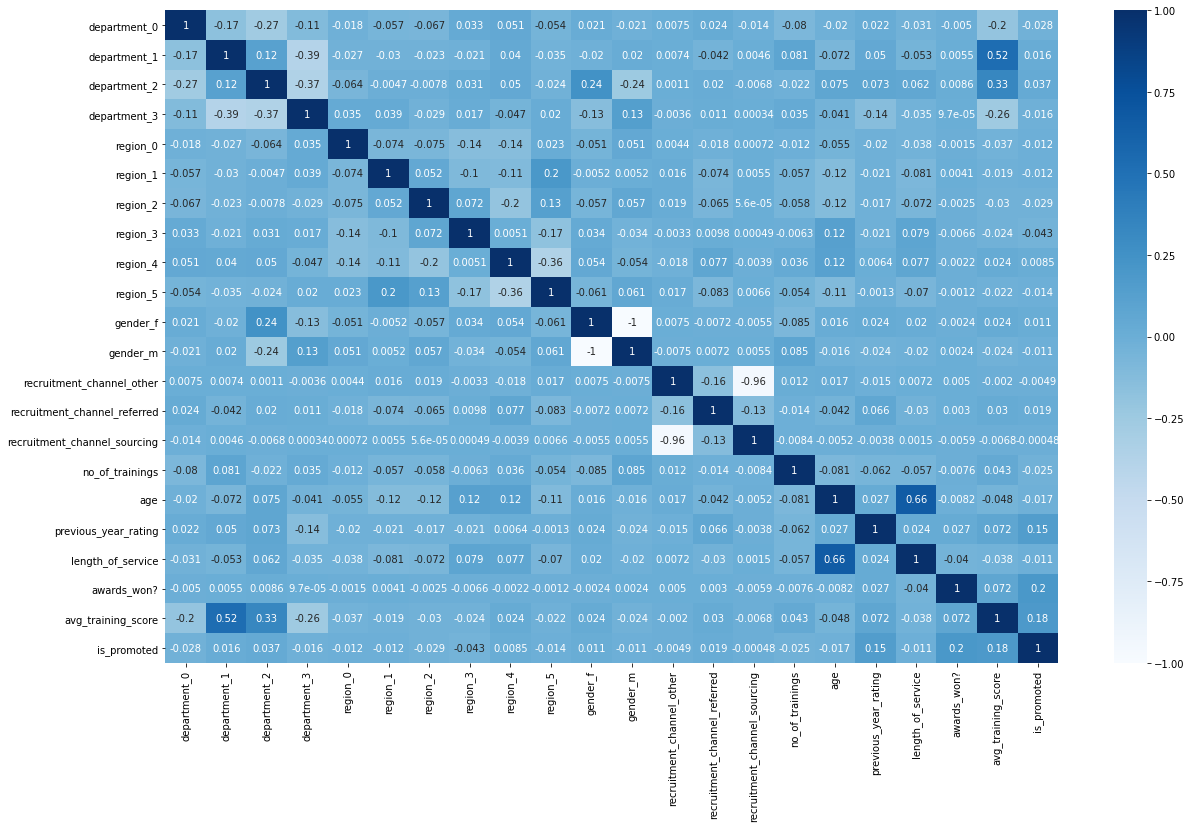

In [170]:
plt.figure(figsize= (20,12))
sns.heatmap(data_final.corr(method= "pearson"), annot= True, cmap="Blues")

In [171]:
data_final.corr(method= "pearson")["is_promoted"].sort_values()

region_3                       -0.042902
region_2                       -0.029496
department_0                   -0.028349
no_of_trainings                -0.024896
age                            -0.017166
department_3                   -0.016064
region_5                       -0.013793
region_0                       -0.011947
region_1                       -0.011583
gender_m                       -0.011109
length_of_service              -0.010670
recruitment_channel_other      -0.004879
recruitment_channel_sourcing   -0.000483
region_4                        0.008528
gender_f                        0.011109
department_1                    0.015829
recruitment_channel_referred    0.018641
department_2                    0.037483
previous_year_rating            0.153230
avg_training_score              0.181147
awards_won?                     0.195871
is_promoted                     1.000000
Name: is_promoted, dtype: float64

Dari tabel di atas, kita melihat fitur-fitur yang memang punya korelasi kuat dengan target adalah:
1. awards_won? (19.5%)
2. avg_training_score (18%)
3. previous_year_rating (15%)

In [173]:
data_final.to_csv('data_prep.csv',index=False)